# E01

## Approach
Find ix given the last two characters.

In [1]:
from operator import concat

import torch

In [2]:
words = list(open('names.txt', 'r').read().splitlines())
words[:3]

['emma', 'olivia', 'ava']

In [3]:
l = ['.'] + sorted(set(i for w in words for i in w))
stoi = {s: i for i, s in enumerate(l)}
itos = {i: s for i, s in enumerate(l)}

In [4]:
# E02
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]


In [5]:
N = torch.zeros([27, 27, 27], dtype=torch.int32)
for w in words_test:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        N[stoi[c1], stoi[c2], stoi[c3]] += 1
N

tensor([[[   0, 3503, 1022,  ...,  100,  412,  784],
         [   0,  174,  153,  ...,   13,  105,  129],
         [   0,  143,    0,  ...,    0,    1,    0],
         ...,
         [   0,   38,    0,  ...,    0,   15,    7],
         [   0,  202,    0,  ...,    0,    0,    5],
         [   0,  373,    0,  ...,    0,   99,    1]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  34,    0,    6,  ...,    0,    7,    8],
         [  26,   23,   17,  ...,    0,   17,    0],
         ...,
         [   8,    1,    0,  ...,   10,    4,    1],
         [ 165,  279,    6,  ...,    0,   12,   30],
         [  27,  110,    0,  ...,    0,   11,   15]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  44,    0,    4,  ...,    3,   28,    5],
         [   0,    7,    0,  ...,    0,    4,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  43,    6,    1,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [6]:
N.shape

torch.Size([27, 27, 27])

In [7]:
N += 1
P = N.float()
P /= P.sum(2, keepdim=True)
P[0]

tensor([[3.8982e-05, 1.3659e-01, 3.9878e-02, 4.9039e-02, 5.6134e-02, 4.6271e-02,
         1.2903e-02, 2.0465e-02, 2.7989e-02, 1.8243e-02, 7.8042e-02, 9.2582e-02,
         4.9039e-02, 7.7925e-02, 3.6799e-02, 1.2396e-02, 1.5827e-02, 3.0406e-03,
         4.8922e-02, 6.3384e-02, 4.0853e-02, 2.4169e-03, 1.0759e-02, 9.8234e-03,
         3.9372e-03, 1.6099e-02, 3.0601e-02],
        [2.8329e-04, 4.9575e-02, 4.3626e-02, 8.2153e-03, 8.6686e-02, 1.2748e-02,
         3.6827e-03, 3.1161e-03, 2.0113e-02, 3.1445e-02, 9.9150e-03, 1.7847e-02,
         1.4929e-01, 8.9802e-02, 1.4363e-01, 2.8329e-03, 3.6827e-03, 3.1161e-03,
         1.0113e-01, 4.0793e-02, 1.5014e-02, 3.4561e-02, 5.7224e-02, 8.4986e-04,
         3.9660e-03, 3.0028e-02, 3.6827e-02],
        [9.5329e-04, 1.3727e-01, 9.5329e-04, 9.5329e-04, 9.5329e-04, 1.9256e-01,
         9.5329e-04, 9.5329e-04, 7.6263e-03, 2.2879e-02, 3.8132e-03, 9.5329e-04,
         5.1478e-02, 9.5329e-04, 9.5329e-04, 7.0543e-02, 9.5329e-04, 9.5329e-04,
         4.8046e-

In [8]:
for i in range(10):
    ix = 0
    out = ['.', '.']
    while True:
        ix = torch.multinomial(P[stoi[out[-2]], stoi[out[-1]]], 1, replacement=True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

..zyahnyi
..jafree
..jal
..aliyianatastoriedwghamaretra
..adicellynluwudgna
..helipmkviovedfdmanrwodas
..silyndoybilla
..kynna
..ramarel
..belip


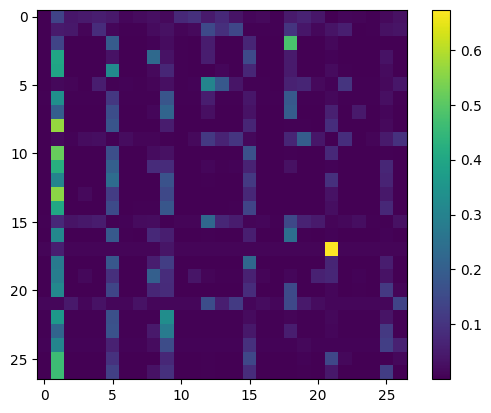

In [9]:
import matplotlib.pyplot as plt

plt.imshow(P[0])
plt.colorbar()

In [10]:
P[0][0]

tensor([3.8982e-05, 1.3659e-01, 3.9878e-02, 4.9039e-02, 5.6134e-02, 4.6271e-02,
        1.2903e-02, 2.0465e-02, 2.7989e-02, 1.8243e-02, 7.8042e-02, 9.2582e-02,
        4.9039e-02, 7.7925e-02, 3.6799e-02, 1.2396e-02, 1.5827e-02, 3.0406e-03,
        4.8922e-02, 6.3384e-02, 4.0853e-02, 2.4169e-03, 1.0759e-02, 9.8234e-03,
        3.9372e-03, 1.6099e-02, 3.0601e-02])

In [11]:
# loss
nll = 0.0
n = 0
for w in words_dev:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        prob = P[stoi[c1], stoi[c2], stoi[c3]]
        nll += -prob.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(101264.8203), 2.219600200653076


# E02

In [12]:
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]

In [13]:
words_dev

['kazumi',
 'freyja',
 'gemma',
 'eisa',
 'carrigan',
 'haram',
 'roman',
 'lilyan',
 'mickey',
 'kastle',
 'xiclaly',
 'karris',
 'myiah',
 'teanna',
 'elanora',
 'emmilia',
 'evelyna',
 'adebowale',
 'amadu',
 'nishad',
 'indi',
 'zidon',
 'aadhyasri',
 'cristel',
 'adiel',
 'redd',
 'eder',
 'sydnie',
 'lorelle',
 'jaylynn',
 'sonam',
 'man',
 'kyzaiah',
 'whalen',
 'bisma',
 'xaria',
 'samriddhi',
 'raquan',
 'gaige',
 'rosselyn',
 'jamillah',
 'cory',
 'antony',
 'norlan',
 'heela',
 'samyah',
 'archer',
 'gorden',
 'demetrice',
 'vidya',
 'britton',
 'harika',
 'elia',
 'aneliz',
 'rmani',
 'cardell',
 'makhi',
 'lorna',
 'swayze',
 'josie',
 'jazzlynn',
 'kloey',
 'ximena',
 'frans',
 'ashanty',
 'adithya',
 'bahram',
 'damein',
 'abdulwahab',
 'arlow',
 'johnathan',
 'kmiya',
 'navi',
 'selvin',
 'xyler',
 'adeliz',
 'marlie',
 'patryk',
 'zymere',
 'khyleigh',
 'yzabella',
 'mak',
 'quin',
 'lennyn',
 'naileth',
 'camille',
 'braydin',
 'mable',
 'nechuma',
 'shambhavi',
 'gil

## Bigram Model (Probabilistic)

In [14]:
Nbi = torch.zeros([27, 27])
for w in words:
    word = "." + w + "."
    for c1, c2 in zip(word, word[1:]):
        Nbi[stoi[c1], stoi[c2]] += 1
N

tensor([[[   1, 3504, 1023,  ...,  101,  413,  785],
         [   1,  175,  154,  ...,   14,  106,  130],
         [   1,  144,    1,  ...,    1,    2,    1],
         ...,
         [   1,   39,    1,  ...,    1,   16,    8],
         [   1,  203,    1,  ...,    1,    1,    6],
         [   1,  374,    1,  ...,    1,  100,    2]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  35,    1,    7,  ...,    1,    8,    9],
         [  27,   24,   18,  ...,    1,   18,    1],
         ...,
         [   9,    2,    1,  ...,   11,    5,    2],
         [ 166,  280,    7,  ...,    1,   13,   31],
         [  28,  111,    1,  ...,    1,   12,   16]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  45,    1,    5,  ...,    4,   29,    6],
         [   1,    8,    1,  ...,    1,    5,    1],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [  44,    7,    2,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]],

In [15]:
Pbi = (Nbi + 0).float()
Pbi /= Pbi.sum(1, keepdim=True)
Pbi

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [16]:
for i in range(5):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(Pbi[ix], 1, True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

b
celiannndavoli
fregria
di
ndanngeiliyndorilyntousian


In [17]:
Pbi[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
# loss
nll = 0.
n = 0
for w in words_dev:
    word = "." + w + "."
    for ch1, ch2 in zip(word, word[1:]):
        probs = Pbi[stoi[ch1], stoi[ch2]]
        nll += -probs.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(112125.4297), 2.460023880004883


## Single Neuron Prediction
Bi-gram

In [19]:
xs, ys = [], []
for w in words:
    word = '.' + w + '.'
    for x, y in zip(word, word[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs[:5], ys[:5]

([0, 5, 13, 13, 1], [5, 13, 13, 1, 0])

In [20]:
import torch.nn.functional as F

xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()
xenc.dtype

torch.float32

In [21]:
W = torch.randn((27, 27), requires_grad=True)
W.shape

torch.Size([27, 27])

In [22]:
for i in range(20):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i+1, loss.item(), sep=": ")

    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


1: 3.7587890625
2: 3.3684871196746826
3: 3.1410071849823
4: 2.9991495609283447
5: 2.906064748764038
6: 2.8384482860565186
7: 2.7865843772888184
8: 2.746225118637085
9: 2.714401960372925
10: 2.688873529434204
11: 2.667987108230591
12: 2.650566339492798
13: 2.635784149169922
14: 2.623053550720215
15: 2.6119534969329834
16: 2.602174997329712
17: 2.5934886932373047
18: 2.5857198238372803
19: 2.578731060028076
20: 2.5724141597747803


In [23]:
g = torch.Generator().manual_seed(2147483647)

out = ["."]
while True:
    ix = stoi[out[-1]]
    x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x @ W
    count = logits.exp()
    prob = count / count.sum(1, keepdim=True)
    pred = prob.multinomial(num_samples=1, replacement=True, generator=g)
    out.append(itos[pred.item()])
    if out[-1] == ".":
        break
print(*out, sep="")

.cexza.


Tri-gram

In [24]:
sstoi = {}

n = 0
for i in range(27):
    for j in range(27):
        sstoi[(i, j)] = n
        n += 1

In [25]:
xss = []
ys = []

for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        xss.append(sstoi[(stoi[c1], stoi[c2])])
        ys.append(stoi[c3])

In [26]:
xs = F.one_hot(torch.tensor(xss), num_classes=n).float()
W = torch.randn([729, 27], requires_grad=True)

In [27]:

for i in range(10):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i, loss, sep=": ")
    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


0: tensor(3.8173, grad_fn=<NegBackward0>)
1: tensor(3.6971, grad_fn=<NegBackward0>)
2: tensor(3.6055, grad_fn=<NegBackward0>)
3: tensor(3.5318, grad_fn=<NegBackward0>)
4: tensor(3.4720, grad_fn=<NegBackward0>)
5: tensor(3.4207, grad_fn=<NegBackward0>)
6: tensor(3.3742, grad_fn=<NegBackward0>)
7: tensor(3.3316, grad_fn=<NegBackward0>)
8: tensor(3.2924, grad_fn=<NegBackward0>)
9: tensor(3.2562, grad_fn=<NegBackward0>)


In [28]:
out = [".", "."]

In [29]:
xs.shape

torch.Size([228146, 729])

In [30]:
t = torch.tensor([[1, 2, 3], [12, 13, 14]])
s = torch.tensor([[1, 2], [2, 3], [3, 4]])
t @ s

tensor([[ 14,  20],
        [ 80, 119]])

In [31]:
out = ['.', '.']
while True:
    ix = sstoi[(stoi[out[-2]], stoi[out[-1]])]
    x = F.one_hot(torch.tensor([ix]), num_classes=n).float()
    logits = x @ W
    count = logits.exp()
    probs = count / count.sum(1, keepdim=True)
    pred = probs.multinomial(1, True).item()
    out.append(itos[pred])
    if out[-1] == '.':
        break
print(*out, sep="")

..cqdnkofkjnlqiwdwmje.


### 1x54 approach
TODO

In [86]:
xs = []
ys = []
for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        ys.append(stoi[c3])
        x1 = list(F.one_hot(torch.tensor(stoi[c1]), num_classes=27).data)
        x1.extend(list(F.one_hot(torch.tensor(stoi[c2]), num_classes=27).data))
        xs.append(x1)
        print(len(xs[len(xs)-1]))
    break

# print(xs[0])
# xs_f = torch.tensor([xs])
ys = torch.tensor(ys)
xs = torch.tensor([xs]).float()
xs_f[:5], ys[:5]

54
54
54
54
54


(tensor([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0]]),
 tensor([ 5, 13, 13,  1,  0]))

In [87]:
x1[:5]

[tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]

x1 -> 27

x2 -> 27

x1 + x2 -> 54

[[54], [54], ...]

In [88]:
W = torch.randn((54, 27), requires_grad=True)

In [92]:
for i in range(20):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs.log().mean()
    print(i+1, loss, sep=": ")


    W.grad = None
    loss.backward()
    W.data -= 15 * W.grad

1: tensor(1.6094, grad_fn=<NegBackward0>)
2: tensor(1.6094, grad_fn=<NegBackward0>)
3: tensor(1.6094, grad_fn=<NegBackward0>)
4: tensor(1.6094, grad_fn=<NegBackward0>)
5: tensor(1.6094, grad_fn=<NegBackward0>)
6: tensor(1.6094, grad_fn=<NegBackward0>)
7: tensor(1.6094, grad_fn=<NegBackward0>)
8: tensor(1.6094, grad_fn=<NegBackward0>)
9: tensor(1.6094, grad_fn=<NegBackward0>)
10: tensor(1.6094, grad_fn=<NegBackward0>)
11: tensor(1.6094, grad_fn=<NegBackward0>)
12: tensor(1.6094, grad_fn=<NegBackward0>)
13: tensor(1.6094, grad_fn=<NegBackward0>)
14: tensor(1.6094, grad_fn=<NegBackward0>)
15: tensor(1.6094, grad_fn=<NegBackward0>)
16: tensor(1.6094, grad_fn=<NegBackward0>)
17: tensor(1.6094, grad_fn=<NegBackward0>)
18: tensor(1.6094, grad_fn=<NegBackward0>)
19: tensor(1.6094, grad_fn=<NegBackward0>)
20: tensor(1.6094, grad_fn=<NegBackward0>)


In [ ]:
# tester

for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        x = []

    break

